#### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("Reds_r")
%config InlineBackend.figure_format ='retina'

# Movies Database Cleaning

In [2]:
# import dataset
original_movies_db = pd.read_excel('datasets/movies.xls')

movies_db = original_movies_db
movies_db

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22 00:00:00,89.0,8.1,Wil Wheaton,299174.0,Stephen King,1986.0
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11 00:00:00,103.0,7.8,Matthew Broderick,264740.0,John Hughes,1986.0
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16 00:00:00,110.0,6.9,Tom Cruise,236909.0,Jim Cash,1986.0
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18 00:00:00,137.0,8.4,Sigourney Weaver,540152.0,James Cameron,1986.0
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01 00:00:00,90.0,6.9,Joey Cramer,36636.0,Mark H. Baker,1986.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6815,0.0,Fox Searchlight Pictures,UK,Mandie Fletcher,Comedy,4750497.0,Absolutely Fabulous: The Movie,R,2016-07-22 00:00:00,91.0,5.4,Jennifer Saunders,9161.0,Jennifer Saunders,2016.0
6816,0.0,Siempre Viva Productions,USA,Paul Duddridge,Drama,28368.0,Mothers and Daughters,PG-13,2016-05-06 00:00:00,90.0,4.9,Selma Blair,1959.0,Paige Cameron,2016.0
6817,3500000.0,Warner Bros. Animation,USA,Sam Liu,Animation,3775000.0,Batman: The Killing Joke,R,2016-07-25 00:00:00,76.0,6.5,Kevin Conroy,36333.0,Brian Azzarello,2016.0
6818,0.0,Borderline Presents,USA,Nicolas Pesce,Drama,25981.0,The Eyes of My Mother,R,2016-12-02 00:00:00,76.0,6.2,Kika Magalh„es,6947.0,Nicolas Pesce,2016.0


In [3]:
# filter to just get 'budget' not equal to 0.0
movies_db = movies_db[(movies_db['budget'] != 0.0)]

In [4]:
# normalize movie names
movies_db['name'] = movies_db['name'].str.replace('&','and').str.replace("'",' ').str.replace('-','').str.replace(',','').str.replace('.','').str.replace(':','').str.strip().str.title()

/Users/marie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [5]:
# exclude null rows
movies_db = movies_db.dropna()

In [6]:
# select the columns we want to keep
movies_db = movies_db[['name', 'budget', 'gross', 'score']]

In [7]:
# rename the columns
movies_db.columns = ['TITLE', 'BUDGET', 'GROSS REVENUE', 'IMDB SCORE']

In [8]:
# create the '% BUDGET/REVENUE' column
movies_db['% BUDGET/REVENUE'] = round((movies_db['BUDGET'] / movies_db['GROSS REVENUE'] * 100), 1)

In [9]:
# Convert 'YEAR' column to 'int' type

#movies_db['YEAR'] = movies_db['YEAR'].astype('str')
#movies_db['YEAR'] = movies_db['YEAR'].apply(lambda x: x.split('.')[0])
#movies_db['YEAR'] = movies_db['YEAR'].astype('int')

In [10]:
# Changing these 2 columns to be in millions
#movies_db['BUDGET'] = round((movies_db['BUDGET'] / 1000000), 1)
#movies_db['REVENUE'] = round((movies_db['REVENUE'] / 1000000), 1)

In [11]:
# final order
movies_db = movies_db[['TITLE', 'BUDGET', 'GROSS REVENUE', '% BUDGET/REVENUE', 'IMDB SCORE']]
movies_db

,TITLE,BUDGET,GROSS REVENUE,% BUDGET/REVENUE,IMDB SCORE
0,Stand By Me,8000000.0,52287414.0,15.3,8.1
1,Ferris Bueller S Day Off,6000000.0,70136369.0,8.6,7.8
2,Top Gun,15000000.0,179800601.0,8.3,6.9
3,Aliens,18500000.0,85160248.0,21.7,8.4
4,Flight Of The Navigator,9000000.0,18564613.0,48.5,6.9
...,...,...,...,...,...
6808,Love And Friendship,3000000.0,14013564.0,21.4,6.5
6809,The Hollars,3800000.0,1016872.0,373.7,6.5
6811,Middle School The Worst Years Of My Life,8500000.0,19985196.0,42.5,6.1
6814,Risen,20000000.0,36874745.0,54.2,6.3


# Awards winning movies cleaning

In [12]:
# get html
url = 'https://en.wikipedia.org/wiki/List_of_Academy_Award-winning_films'
html = requests.get(url).content
soup = BeautifulSoup(html, "lxml")

# get table content - tag: tbody
table_body = soup.find_all('tbody')[0]
rows = [element.text for element in table_body.find_all('tr')]

# clean rows
clean_rows = [row.strip().replace('\n','  ').split('  ') for row in rows]

# rename columns
colnames = ['TITLE', 'YEAR', 'AWARDS', 'NOMINATIONS']

# create dataframe
awards = pd.DataFrame(clean_rows[1:], columns = colnames)

In [13]:
awards

,TITLE,YEAR,AWARDS,NOMINATIONS
0,Green Book,2018,3,5
1,Bohemian Rhapsody,2018,4,5
2,Roma,2018,3,10
3,Black Panther,2018,3,7
4,The Favourite,2018,1,10
...,...,...,...,...
1294,The Yankee Doodle Mouse,1943,1,1
1295,The Yearling,1946,2,7
1296,"Yesterday, Today and Tomorrow (Ieri, oggi, dom...",1964,1,1
1297,You Can't Take It with You,1938,2,7


In [14]:
# clean movie title
awards['TITLE'] = awards['TITLE'].str.replace('&','and').str.replace("'",' ').str.replace('-','').str.replace(',','').str.replace('.','').str.replace(':','').str.strip().str.title()
awards['TITLE'] = awards['TITLE'].apply(lambda x: x.split('(')[0])
awards['TITLE'] = awards['TITLE'].str.strip()

In [15]:
# select movies to match the movies' file year range
awards = awards[(awards['YEAR'] <= '2016') & (awards['YEAR'] >= '1986')]
awards['YEAR'] = awards['YEAR'].astype('int')

/Users/marie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [16]:
# clean awards column
awards['AWARDS'] = awards['AWARDS'].apply(lambda x: x.split(' ')[0])

/Users/marie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [17]:
# reset the index, as it was starting at 31
awards.reset_index()
awards_db = awards[['TITLE', 'AWARDS', 'NOMINATIONS']]

In [18]:
awards_db

,TITLE,AWARDS,NOMINATIONS
31,Moonlight,3,8
32,La La Land,6,14
33,Hacksaw Ridge,2,6
34,Manchester By The Sea,2,6
35,Arrival,1,8
...,...,...,...
474,Down And Out In America,1,1
475,The Fly,1,1
476,A Greek Tragedy,1,1
477,Precious Images,1,1


# Rotten tomatoes cleaning

In [19]:
# import file
rotten_tomatoes_original = pd.read_csv('datasets/rotten_tomatoes_movies.csv')
rotten_tomatoes_original

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,poster_image_url,rating,genre,directors,writers,cast,...,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,audience_top_critics_count,audience_fresh_critics_count,audience_rotten_critics_count
0,/m/0814255,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,https://resizing.flixster.com/p1veUpQ4ktsSHtRu...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",...,20th Century Fox,Rotten,49,144,Spilled,53.0,254287.0,38,71,73
1,/m/0878835,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,https://resizing.flixster.com/0AbudQ4KsB4BeXSB...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",...,Sony Pictures Classics,Certified Fresh,86,140,Upright,64.0,11567.0,43,121,19
2,/m/10,10,Blake Edwards' 10 stars Dudley Moore as George...,NaN,https://resizing.flixster.com/mF0dxH6UTa0FdkMs...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",...,Waner Bros.,Fresh,68,22,Spilled,53.0,14670.0,2,15,7
3,/m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",Sidney Lumet's feature debut is a superbly wri...,https://resizing.flixster.com/u-8xAyGaDVvROLiR...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",...,Criterion Collection,Certified Fresh,100,51,Upright,97.0,105000.0,6,51,0
4,/m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...","One of Disney's finest live-action adventures,...",https://resizing.flixster.com/FKExgYBHu07XLoil...,G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",...,Disney,Fresh,89,27,Upright,74.0,68860.0,5,24,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16633,/m/zoot_suit,Zoot Suit,"Based on a 1940s Los Angeles murder trial, thi...",NaN,https://resizing.flixster.com/aN813Th-ct2RYBoO...,R,"Drama, Musical & Performing Arts",Luis Valdez,Luis Valdez,"Daniel Valdez, Edward James Olmos, Charles Aid...",...,MCA Universal Home Video,Rotten,56,9,Upright,74.0,1192.0,2,5,4
16634,/m/zootopia,Zootopia,The modern mammal metropolis of Zootopia is a ...,The brilliantly well-rounded Zootopia offers a...,https://resizing.flixster.com/fBep1-c91oIjvXBM...,PG,"Action & Adventure, Animation, Comedy","Byron Howard, Rich Moore, Jared Bush","Jared Bush, Phil Johnston","Ginnifer Goodwin, Jason Bateman, Idris Elba, J...",...,Walt Disney Animation Studios,Certified Fresh,97,279,Upright,92.0,100946.0,47,272,7
16635,/m/zorba_the_greek,Zorba the Greek,If ever there was a role that Anthony Quinn wa...,NaN,https://resizing.flixster.com/dpBkx_TAP6Z0P0Pl...,NR,"Action & Adventure, Art House & International,...",NaN,NaN,"Anthony Quinn, Alan Bates, Irene Papas, Lila K...",...,Fox,Fresh,78,9,Upright,87.0,7126.0,0,7,2
16636,/m/zulu,Zulu,"Filmed on a grand scale, Zulu is a rousing rec...",NaN,https://resizing.flixster.com/lwPbtPs4ikIa2JNy...,PG,"Classics, Drama","Cy Endfield, Cyril Endfield","Cy Endfield, John Prebble","Stanley Baker, Jack Hawkins, Ulla Jacobsson, J...",...,Paramount Pictures,Fresh,95,21,Upright,91.0,30170.0,5,20,1


In [20]:
# keep only columns we need
rotten_tomatoes_db = rotten_tomatoes_original[['movie_title', 'audience_rating']]
rotten_tomatoes_db.columns = ['TITLE', 'ROTTEN TOMATOES SCORE']

In [21]:
# clean movie titles
rotten_tomatoes_db['TITLE'] = rotten_tomatoes_db['TITLE'].str.replace('&','and').str.replace("'",' ').str.replace('-','').str.replace(',','').str.replace('.','').str.replace(':','').str.strip().str.title()

/Users/marie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [22]:
# normalize score
rotten_tomatoes_db['ROTTEN TOMATOES SCORE'] = rotten_tomatoes_db['ROTTEN TOMATOES SCORE'] / 10

/Users/marie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [23]:
rotten_tomatoes_db

,TITLE,ROTTEN TOMATOES SCORE
0,Percy Jackson And The Olympians The Lightning ...,5.3
1,Please Give,6.4
2,10,5.3
3,12 Angry Men (Twelve Angry Men),9.7
4,20000 Leagues Under The Sea,7.4
...,...,...
16633,Zoot Suit,7.4
16634,Zootopia,9.2
16635,Zorba The Greek,8.7
16636,Zulu,9.1


# Merge movies and awards

In [24]:
# merge movies and awards datasets
all_db = pd.merge(movies_db, awards_db, on = 'TITLE', how = 'outer')

In [25]:
# sort by title and reset index
all_db = all_db.sort_values(by= ['TITLE'])
all_db.reset_index()

,index,TITLE,BUDGET,GROSS REVENUE,% BUDGET/REVENUE,IMDB SCORE,AWARDS,NOMINATIONS
0,4523,10 Cloverfield Lane,15000000.0,71897215.0,20.9,7.2,NaN,NaN
1,1584,10 Things I Hate About You,30000000.0,38176108.0,78.6,7.2,NaN,NaN
2,3182,10000 Bc,105000000.0,94784201.0,110.8,5.1,NaN,NaN
3,1160,101 Dalmatians,75000000.0,136189294.0,55.1,5.7,NaN,NaN
4,1843,102 Dalmatians,85000000.0,66957026.0,126.9,4.8,NaN,NaN
...,...,...,...,...,...,...,...,...
4805,3447,[Rec] 2,5600000.0,27766.0,20168.6,6.6,NaN,NaN
4806,3954,[Rec] 3 Genesis,6400000.0,8973.0,71325.1,5.0,NaN,NaN
4807,27,°Three Amigos!,25000000.0,39246734.0,63.7,6.4,NaN,NaN
4808,3739,Øsabes Quièn Viene?,25000000.0,2547047.0,981.5,7.2,NaN,NaN


In [26]:
# fill 'AWARDS', 'NOMINATIONS' nulls with 0 and reset index
all_db[['AWARDS', 'NOMINATIONS']] = all_db[['AWARDS', 'NOMINATIONS']].fillna(0)
all_db = all_db.reset_index()

In [27]:
# drop remaining null rows
all_db = all_db.dropna()

In [28]:
# final order
all_db = all_db[['TITLE', 'BUDGET', 'GROSS REVENUE','% BUDGET/REVENUE', 'IMDB SCORE', 'AWARDS', 'NOMINATIONS']]
all_db

,TITLE,BUDGET,GROSS REVENUE,% BUDGET/REVENUE,IMDB SCORE,AWARDS,NOMINATIONS
0,10 Cloverfield Lane,15000000.0,71897215.0,20.9,7.2,0,0
1,10 Things I Hate About You,30000000.0,38176108.0,78.6,7.2,0,0
2,10000 Bc,105000000.0,94784201.0,110.8,5.1,0,0
3,101 Dalmatians,75000000.0,136189294.0,55.1,5.7,0,0
4,102 Dalmatians,85000000.0,66957026.0,126.9,4.8,0,0
...,...,...,...,...,...,...,...
4805,[Rec] 2,5600000.0,27766.0,20168.6,6.6,0,0
4806,[Rec] 3 Genesis,6400000.0,8973.0,71325.1,5.0,0,0
4807,°Three Amigos!,25000000.0,39246734.0,63.7,6.4,0,0
4808,Øsabes Quièn Viene?,25000000.0,2547047.0,981.5,7.2,0,0


# Merge all and rotten tomatoes

In [29]:
# merge rotten tomatoes with the rest
all_db = pd.merge(all_db, rotten_tomatoes_db, on = 'TITLE')
all_db

,TITLE,BUDGET,GROSS REVENUE,% BUDGET/REVENUE,IMDB SCORE,AWARDS,NOMINATIONS,ROTTEN TOMATOES SCORE
0,10 Cloverfield Lane,15000000.0,71897215.0,20.9,7.2,0,0,7.9
1,10 Things I Hate About You,30000000.0,38176108.0,78.6,7.2,0,0,6.9
2,10000 Bc,105000000.0,94784201.0,110.8,5.1,0,0,3.7
3,101 Dalmatians,75000000.0,136189294.0,55.1,5.7,0,0,7.6
4,101 Dalmatians,75000000.0,136189294.0,55.1,5.7,0,0,4.0
...,...,...,...,...,...,...,...,...
4242,Zoolander 2,50000000.0,28848693.0,173.3,4.7,0,0,2.0
4243,Zoom,35000000.0,11631245.0,300.9,4.3,0,0,3.3
4244,Zootopia,150000000.0,341268248.0,44.0,8.0,1,1,9.2
4245,[Rec] 2,5600000.0,27766.0,20168.6,6.6,0,0,6.0


In [30]:
# reorder columns
all_db = all_db[['TITLE', 'BUDGET', 'GROSS REVENUE', '% BUDGET/REVENUE', 'IMDB SCORE', 'ROTTEN TOMATOES SCORE', 'AWARDS', 'NOMINATIONS']]

In [31]:
# drop duplicates
all_db = all_db.drop_duplicates(['TITLE'])
all_db.reset_index()

,index,TITLE,BUDGET,GROSS REVENUE,% BUDGET/REVENUE,IMDB SCORE,ROTTEN TOMATOES SCORE,AWARDS,NOMINATIONS
0,0,10 Cloverfield Lane,15000000.0,71897215.0,20.9,7.2,7.9,0,0
1,1,10 Things I Hate About You,30000000.0,38176108.0,78.6,7.2,6.9,0,0
2,2,10000 Bc,105000000.0,94784201.0,110.8,5.1,3.7,0,0
3,3,101 Dalmatians,75000000.0,136189294.0,55.1,5.7,7.6,0,0
4,5,102 Dalmatians,85000000.0,66957026.0,126.9,4.8,3.2,0,0
...,...,...,...,...,...,...,...,...,...
3873,4242,Zoolander 2,50000000.0,28848693.0,173.3,4.7,2.0,0,0
3874,4243,Zoom,35000000.0,11631245.0,300.9,4.3,3.3,0,0
3875,4244,Zootopia,150000000.0,341268248.0,44.0,8.0,9.2,1,1
3876,4245,[Rec] 2,5600000.0,27766.0,20168.6,6.6,6.0,0,0


In [32]:
# Ratio tomatoes and IMDB
all_db['IMDB-R.TOMATOES'] = all_db['IMDB SCORE'] - all_db['ROTTEN TOMATOES SCORE']
all_db = all_db[['TITLE', 'BUDGET', 'GROSS REVENUE', '% BUDGET/REVENUE', 'IMDB SCORE', 'ROTTEN TOMATOES SCORE', 'IMDB-R.TOMATOES', 'AWARDS', 'NOMINATIONS']]
all_db = all_db.reset_index(drop = True)
all_db

,TITLE,BUDGET,GROSS REVENUE,% BUDGET/REVENUE,IMDB SCORE,ROTTEN TOMATOES SCORE,IMDB-R.TOMATOES,AWARDS,NOMINATIONS
0,10 Cloverfield Lane,15000000.0,71897215.0,20.9,7.2,7.9,-0.7,0,0
1,10 Things I Hate About You,30000000.0,38176108.0,78.6,7.2,6.9,0.3,0,0
2,10000 Bc,105000000.0,94784201.0,110.8,5.1,3.7,1.4,0,0
3,101 Dalmatians,75000000.0,136189294.0,55.1,5.7,7.6,-1.9,0,0
4,102 Dalmatians,85000000.0,66957026.0,126.9,4.8,3.2,1.6,0,0
...,...,...,...,...,...,...,...,...,...
3873,Zoolander 2,50000000.0,28848693.0,173.3,4.7,2.0,2.7,0,0
3874,Zoom,35000000.0,11631245.0,300.9,4.3,3.3,1.0,0,0
3875,Zootopia,150000000.0,341268248.0,44.0,8.0,9.2,-1.2,1,1
3876,[Rec] 2,5600000.0,27766.0,20168.6,6.6,6.0,0.6,0,0


# Stats

In [33]:
stats_all = all_db.describe()
max_budget = stats_all['BUDGET'].loc['max']
min_budget = stats_all['BUDGET'].loc['min']
gap = (max_budget - min_budget) / 10
max_budget

260000000.0

In [34]:
stats_all

,BUDGET,GROSS REVENUE,% BUDGET/REVENUE,IMDB SCORE,ROTTEN TOMATOES SCORE,IMDB-R.TOMATOES
count,3.878000e+03,3.878000e+03,3.878000e+03,3878.000000,3875.000000,3875.000000
mean,3.759698e+07,4.818629e+07,3.076580e+03,6.373053,5.980619,0.392052
std,4.040369e+07,6.593722e+07,3.603835e+04,0.983909,1.929756,1.264792
min,6.000000e+03,1.098000e+03,0.000000e+00,1.900000,1.000000,-4.800000
25%,1.100000e+07,8.085996e+06,4.980000e+01,5.800000,4.500000,-0.600000
50%,2.500000e+07,2.635285e+07,9.870000e+01,6.400000,6.100000,0.300000
75%,5.000000e+07,6.006223e+07,2.235750e+02,7.100000,7.600000,1.400000
max,2.600000e+08,7.605076e+08,1.305556e+06,9.300000,9.800000,5.400000


### Remove budget outliers

In [35]:
# get quartiles
budget_Q1 = stats_all['BUDGET'].loc['25%']
budget_Q3 = stats_all['BUDGET'].loc['75%']

# calculate IQR 
budget_IQR = budget_Q3 - budget_Q1

# calculate limits
budget_upper_limit = budget_Q3 + 1.5 * budget_IQR
budget_lower_limit = budget_Q1 - 1.5 * budget_IQR

# remove outliers
db_no_outliers = all_db[(all_db['BUDGET'] >= budget_lower_limit) & (all_db['BUDGET'] <= budget_upper_limit)]
db_no_outliers 

,TITLE,BUDGET,GROSS REVENUE,% BUDGET/REVENUE,IMDB SCORE,ROTTEN TOMATOES SCORE,IMDB-R.TOMATOES,AWARDS,NOMINATIONS
0,10 Cloverfield Lane,15000000.0,71897215.0,20.9,7.2,7.9,-0.7,0,0
1,10 Things I Hate About You,30000000.0,38176108.0,78.6,7.2,6.9,0.3,0,0
2,10000 Bc,105000000.0,94784201.0,110.8,5.1,3.7,1.4,0,0
3,101 Dalmatians,75000000.0,136189294.0,55.1,5.7,7.6,-1.9,0,0
4,102 Dalmatians,85000000.0,66957026.0,126.9,4.8,3.2,1.6,0,0
...,...,...,...,...,...,...,...,...,...
3872,Zoolander,28000000.0,45172250.0,62.0,6.6,8.0,-1.4,0,0
3873,Zoolander 2,50000000.0,28848693.0,173.3,4.7,2.0,2.7,0,0
3874,Zoom,35000000.0,11631245.0,300.9,4.3,3.3,1.0,0,0
3876,[Rec] 2,5600000.0,27766.0,20168.6,6.6,6.0,0.6,0,0


### Remove revenue outliers

In [36]:
# get quartiles
revenue_Q1 = stats_all['GROSS REVENUE'].loc['25%']
revenue_Q3 = stats_all['GROSS REVENUE'].loc['75%']

# calculate IQR
revenue_IQR = revenue_Q3 - revenue_Q1

# calculate limits
revenue_upper_limit = revenue_Q3 + 1.5 * revenue_IQR
revenue_lower_limit = revenue_Q1 - 1.5 * revenue_IQR

# remove outliers
db_no_outliers = db_no_outliers[(db_no_outliers['GROSS REVENUE'] >= revenue_lower_limit) & (db_no_outliers['GROSS REVENUE'] <= revenue_upper_limit)]
db_no_outliers

,TITLE,BUDGET,GROSS REVENUE,% BUDGET/REVENUE,IMDB SCORE,ROTTEN TOMATOES SCORE,IMDB-R.TOMATOES,AWARDS,NOMINATIONS
0,10 Cloverfield Lane,15000000.0,71897215.0,20.9,7.2,7.9,-0.7,0,0
1,10 Things I Hate About You,30000000.0,38176108.0,78.6,7.2,6.9,0.3,0,0
2,10000 Bc,105000000.0,94784201.0,110.8,5.1,3.7,1.4,0,0
3,101 Dalmatians,75000000.0,136189294.0,55.1,5.7,7.6,-1.9,0,0
4,102 Dalmatians,85000000.0,66957026.0,126.9,4.8,3.2,1.6,0,0
...,...,...,...,...,...,...,...,...,...
3872,Zoolander,28000000.0,45172250.0,62.0,6.6,8.0,-1.4,0,0
3873,Zoolander 2,50000000.0,28848693.0,173.3,4.7,2.0,2.7,0,0
3874,Zoom,35000000.0,11631245.0,300.9,4.3,3.3,1.0,0,0
3876,[Rec] 2,5600000.0,27766.0,20168.6,6.6,6.0,0.6,0,0


In [37]:
stats_no_outliers = db_no_outliers.describe()

In [38]:
# calculating mean for revenue and budget
mean_revenue_budget = (stats_no_outliers['BUDGET'].loc['mean']) / (stats_no_outliers['GROSS REVENUE'].loc['mean'])
mean_revenue_budget

0.8909031371617018

## Plots

### All movies without outliers

#### Relation - budget and revenue

Text(6.674999999999997, 0.5, 'GROSS REVENUE (M$)')

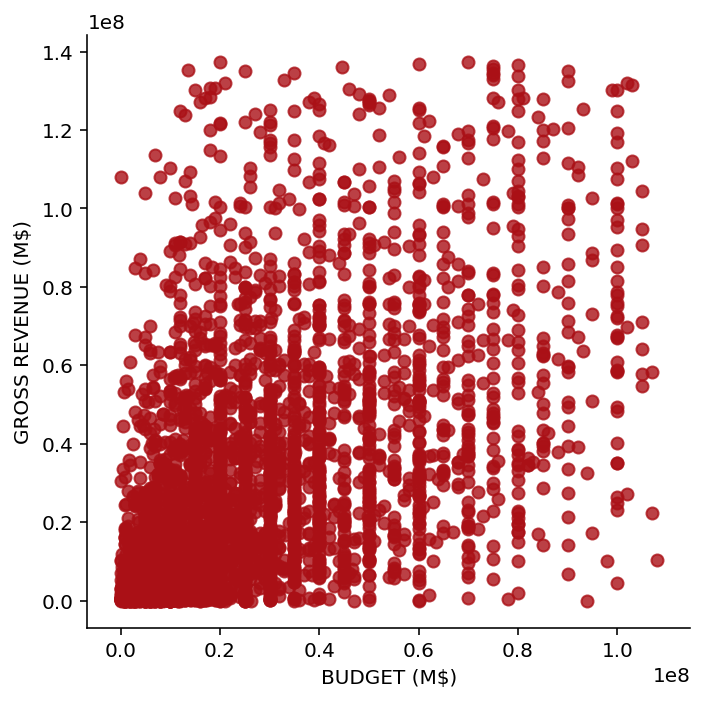

In [39]:
# plot
db_no_outliers = db_no_outliers.sort_values(by = ['BUDGET', 'GROSS REVENUE'])
sns.lmplot(x = 'BUDGET', y = 'GROSS REVENUE', data = db_no_outliers, fit_reg = False)
plt.xlabel('BUDGET (M$)')
plt.ylabel('GROSS REVENUE (M$)')

In [40]:
# correlation
db_no_outliers[['BUDGET', 'GROSS REVENUE']].corr()

,BUDGET,GROSS REVENUE
BUDGET,1.000000,0.518073
GROSS REVENUE,0.518073,1.000000


#### Relation - budget and ratings

Text(0.5, 0, 'BUDGET (M$)')

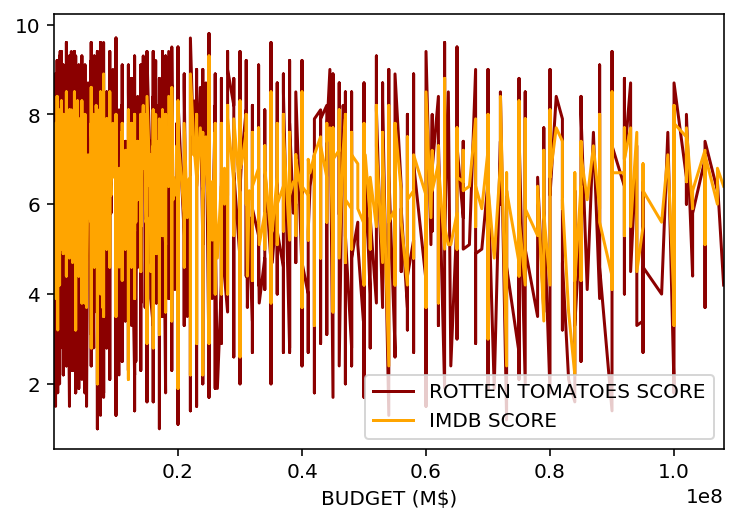

In [67]:
# plot
db_no_outliers.plot(x = 'BUDGET', y = ['ROTTEN TOMATOES SCORE', 'IMDB SCORE'], color = ('darkred', 'orange'))
plt.xlabel('BUDGET (M$)')

In [42]:
# correlation
db_no_outliers[['BUDGET', 'IMDB SCORE', 'ROTTEN TOMATOES SCORE']].corr()

,BUDGET,IMDB SCORE,ROTTEN TOMATOES SCORE
BUDGET,1.000000,-0.077844,-0.110849
IMDB SCORE,-0.077844,1.000000,0.807978
ROTTEN TOMATOES SCORE,-0.110849,0.807978,1.000000


#### Relation - budget and awards

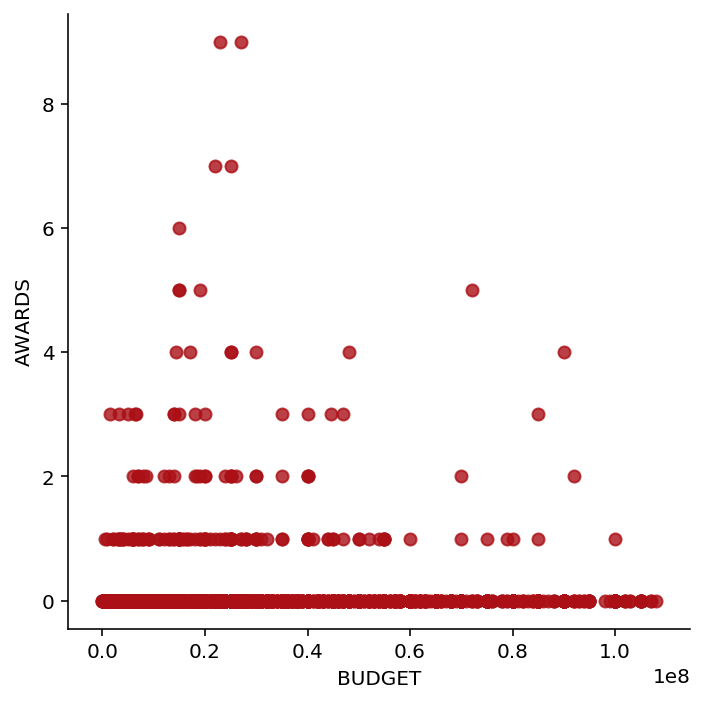

In [43]:
# plot
db_no_outliers['AWARDS'] = db_no_outliers['AWARDS'].astype('int')
sns.lmplot(x = 'BUDGET', y = 'AWARDS', data = db_no_outliers, fit_reg = False)

In [44]:
# correlation
db_no_outliers[['BUDGET', 'AWARDS']].corr()

,BUDGET,AWARDS
BUDGET,1.00000,-0.01189
AWARDS,-0.01189,1.00000


### Awards movies only

In [45]:
all_db['AWARDS'] = all_db['AWARDS'].astype('int')
awards_movies = all_db[(all_db['AWARDS'] > 0)]
awards_movies.reset_index(drop=True)

,TITLE,BUDGET,GROSS REVENUE,% BUDGET/REVENUE,IMDB SCORE,ROTTEN TOMATOES SCORE,IMDB-R.TOMATOES,AWARDS,NOMINATIONS
0,12 Years A Slave,20000000.0,56671993.0,35.3,8.1,9.0,-0.9,3,9
1,8 Mile,41000000.0,116724075.0,35.1,7.0,5.4,1.6,1,1
2,A Beautiful Mind,58000000.0,170742341.0,34.0,8.2,9.3,-1.1,4,8
3,A Fish Called Wanda,7500000.0,63493712.0,11.8,7.6,8.4,-0.8,1,3
4,A Separation,500000.0,7098492.0,7.0,8.4,9.2,-0.8,1,2
...,...,...,...,...,...,...,...,...,...
238,Who Framed Roger Rabbit,70000000.0,156452370.0,44.7,7.7,8.4,-0.7,3,6
239,Wonder Boys,55000000.0,19389454.0,283.7,7.4,8.3,-0.9,1,3
240,Working Girl,28000000.0,64000000.0,43.8,6.7,6.7,0.0,1,6
241,Zero Dark Thirty,40000000.0,95720716.0,41.8,7.4,8.0,-0.6,1,5


In [46]:
awards_movies

,TITLE,BUDGET,GROSS REVENUE,% BUDGET/REVENUE,IMDB SCORE,ROTTEN TOMATOES SCORE,IMDB-R.TOMATOES,AWARDS,NOMINATIONS
6,12 Years A Slave,20000000.0,56671993.0,35.3,8.1,9.0,-0.9,3,9
41,8 Mile,41000000.0,116724075.0,35.1,7.0,5.4,1.6,1,1
47,A Beautiful Mind,58000000.0,170742341.0,34.0,8.2,9.3,-1.1,4,8
56,A Fish Called Wanda,7500000.0,63493712.0,11.8,7.6,8.4,-0.8,1,3
91,A Separation,500000.0,7098492.0,7.0,8.4,9.2,-0.8,1,2
...,...,...,...,...,...,...,...,...,...
3796,Who Framed Roger Rabbit,70000000.0,156452370.0,44.7,7.7,8.4,-0.7,3,6
3830,Wonder Boys,55000000.0,19389454.0,283.7,7.4,8.3,-0.9,1,3
3833,Working Girl,28000000.0,64000000.0,43.8,6.7,6.7,0.0,1,6
3867,Zero Dark Thirty,40000000.0,95720716.0,41.8,7.4,8.0,-0.6,1,5


#### Relation - Budget and gross revenue 

Text(16.299999999999997, 0.5, 'GROSS REVENUE (M$)')

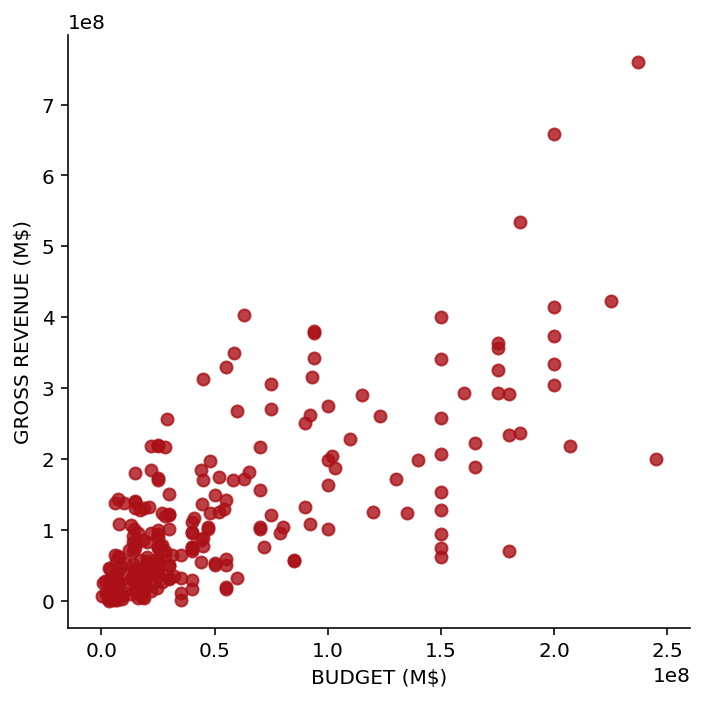

In [47]:
# plot
awards_movies = awards_movies.sort_values(by = ['BUDGET', 'GROSS REVENUE'])
sns.lmplot(x = 'BUDGET', y = 'GROSS REVENUE', data = awards_movies, fit_reg = False)
plt.xlabel('BUDGET (M$)')
plt.ylabel('GROSS REVENUE (M$)')

In [48]:
# correlation
awards_movies[['BUDGET', 'GROSS REVENUE']].corr()

,BUDGET,GROSS REVENUE
BUDGET,1.000000,0.728092
GROSS REVENUE,0.728092,1.000000


#### Relation - budget and awards

Text(0.5, 0, 'BUDGET (M$)')

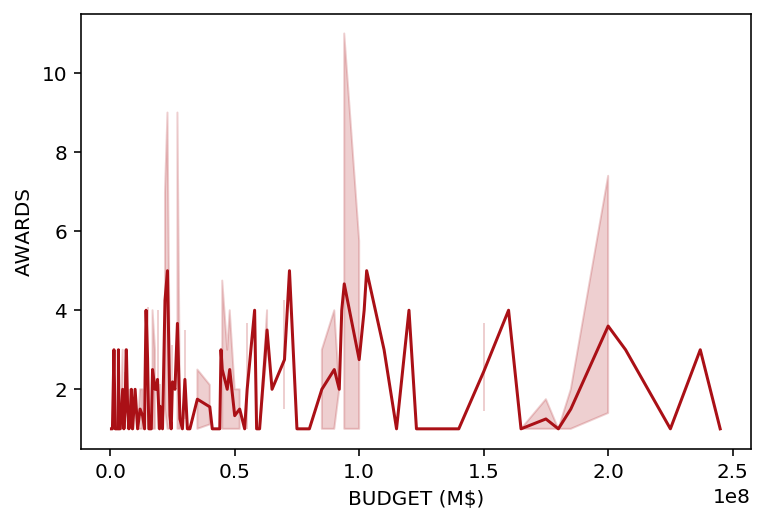

In [49]:
# plot
sns.lineplot(data = awards_movies, x = 'BUDGET', y = 'AWARDS')
plt.xlabel('BUDGET (M$)')

In [68]:
# correlation
awards_movies[['BUDGET', 'AWARDS']].corr()

,BUDGET,AWARDS
BUDGET,1.000000,0.076982
AWARDS,0.076982,1.000000


#### Relation - budget and ratings

Text(0.5, 0, 'BUDGET (M$)')

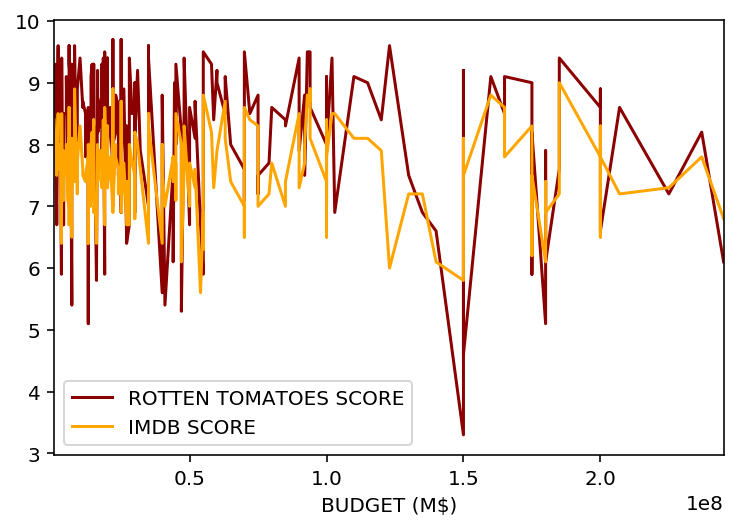

In [69]:
# plot
awards_movies.plot(x = 'BUDGET', y = ['ROTTEN TOMATOES SCORE', 'IMDB SCORE'], color = ('darkred', 'orange'))
plt.xlabel('BUDGET (M$)')

In [70]:
# correlation
awards_movies[['BUDGET', 'IMDB SCORE', 'ROTTEN TOMATOES SCORE']].corr()

,BUDGET,IMDB SCORE,ROTTEN TOMATOES SCORE
BUDGET,1.000000,-0.042295,-0.161723
IMDB SCORE,-0.042295,1.000000,0.768344
ROTTEN TOMATOES SCORE,-0.161723,0.768344,1.000000


In [50]:
awards_movies.describe()

,BUDGET,GROSS REVENUE,% BUDGET/REVENUE,IMDB SCORE,ROTTEN TOMATOES SCORE,IMDB-R.TOMATOES,AWARDS
count,2.430000e+02,2.430000e+02,243.00000,243.000000,243.000000,243.000000,243.000000
mean,5.288021e+07,1.192848e+08,109.45144,7.606173,8.191770,-0.585597,2.049383
std,5.606663e+07,1.174002e+08,476.60049,0.620919,1.067986,0.712114,1.776113
min,5.000000e+05,5.455600e+04,3.60000,5.600000,3.300000,-3.600000,1.000000
25%,1.500000e+07,3.529677e+07,24.55000,7.200000,7.700000,-1.000000,1.000000
50%,2.800000e+07,7.732442e+07,41.90000,7.700000,8.500000,-0.800000,1.000000
75%,7.000000e+07,1.707149e+08,70.15000,8.000000,8.900000,-0.300000,2.000000
max,2.450000e+08,7.605076e+08,5865.50000,9.000000,9.700000,2.900000,11.000000


In [51]:
#sns.set(style='ticks')
#sns.pairplot(awards_movies)

## Budgets and awards

In [52]:
# Bins
labels = ['0-26', '26-52', '52-78', '78-104', '104-130', '130-156', '156-182', '182-208', '208-234', '234-260']
cutoffs = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

budget_bins = pd.qcut(all_db['BUDGET'], cutoffs, labels = labels)
all_db_bins = pd.merge(all_db, budget_bins, left_index = True, right_index = True)
all_db_bins.columns = ['TITLE', 'BUDGET', 'GROSS REVENUE', '% BUDGET/REVENUE', 'IMDB SCORE', 'ROTTEN TOMATOES SCORE', 'IMDB-R.TOMATOES', 'AWARDS', 'NOMINATIONS', 'BUDGET LABEL']

In [53]:
all_db_bins

,TITLE,BUDGET,GROSS REVENUE,% BUDGET/REVENUE,IMDB SCORE,ROTTEN TOMATOES SCORE,IMDB-R.TOMATOES,AWARDS,NOMINATIONS,BUDGET LABEL
0,10 Cloverfield Lane,15000000.0,71897215.0,20.9,7.2,7.9,-0.7,0,0,78-104
1,10 Things I Hate About You,30000000.0,38176108.0,78.6,7.2,6.9,0.3,0,0,130-156
2,10000 Bc,105000000.0,94784201.0,110.8,5.1,3.7,1.4,0,0,234-260
3,101 Dalmatians,75000000.0,136189294.0,55.1,5.7,7.6,-1.9,0,0,208-234
4,102 Dalmatians,85000000.0,66957026.0,126.9,4.8,3.2,1.6,0,0,208-234
...,...,...,...,...,...,...,...,...,...,...
3873,Zoolander 2,50000000.0,28848693.0,173.3,4.7,2.0,2.7,0,0,182-208
3874,Zoom,35000000.0,11631245.0,300.9,4.3,3.3,1.0,0,0,156-182
3875,Zootopia,150000000.0,341268248.0,44.0,8.0,9.2,-1.2,1,1,234-260
3876,[Rec] 2,5600000.0,27766.0,20168.6,6.6,6.0,0.6,0,0,26-52


In [54]:
new_db_bins = all_db_bins.groupby('BUDGET LABEL', as_index = False).agg({'AWARDS':'sum'})
new_db_bins.columns = ['BUDGET LABEL', 'NUMBER OF AWARDS']

In [55]:
new_db_bins

,BUDGET LABEL,NUMBER OF AWARDS
0,0-26,22
1,26-52,35
2,52-78,21
3,78-104,58
4,104-130,91
5,130-156,37
6,156-182,23
7,182-208,53
8,208-234,34
9,234-260,124


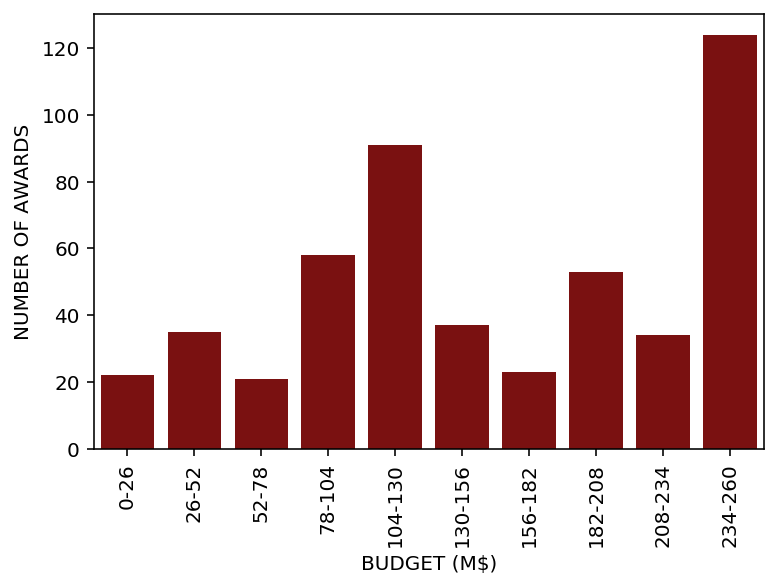

In [72]:
# plot
fig = sns.barplot(x = 'BUDGET LABEL', y = 'NUMBER OF AWARDS', data = new_db_bins, color = 'darkred')
fig.set_xticklabels(fig.get_xticklabels(), rotation = 90)
plt.xlabel('BUDGET (M$)')
plt.show()

In [73]:
# correlation
new_db_bins.corr()

,NUMBER OF AWARDS
NUMBER OF AWARDS,1.0
